In [9]:
from sklearn import preprocessing
from sklearn.externals import joblib
import sklearn as skl
from sklearn import tree
from collections import defaultdict
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report 
%matplotlib inline
import time
import warnings
# 5-class classification version
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, zero_one_loss, accuracy_score
# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 100)

In [4]:
data_root_dir = r'D:\CIC\All-Split-Data'

# Load all the training and testing data
X_train = pd.read_pickle(f'{data_root_dir}\X_train.pkl')
X_test = pd.read_pickle(f'{data_root_dir}\X_test.pkl')
y_test = pd.read_pickle(f'{data_root_dir}\y_test.pkl')
y_train = pd.read_pickle(f'{data_root_dir}\y_train.pkl')

In [5]:
# Timer to see how long it takes to test the algorithm
startTime = time.perf_counter()

rf_classifier = RandomForestClassifier(n_estimators = 10, random_state = 10, n_jobs=-1)
rf_classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred_rf = rf_classifier.predict(X_test)

rf_results = confusion_matrix(y_test, y_pred_rf)
rf_error = zero_one_loss(y_test, y_pred_rf)
rf_score = accuracy_score(y_test, y_pred_rf) * 100
rf_report = classification_report(y_test, y_pred_rf)

# Print endTime - startTime to calculate how long it takes
endTime = time.perf_counter()

In [6]:
print(f"Total time: {endTime - startTime:0.4f} seconds \n")
print("Decision Tree Classifier Results")
print("=================================================")
print(f"Confusion Matrix:")
print(f"{rf_results[0]}")
print(f"{rf_results[1]} \n")

print("Report :")
print(rf_report) 

print(f"True Postive   : {rf_results[0][0]}")
print(f"False Positive : {rf_results[0][1]}")
print(f"False Negative : {rf_results[1][0]}")
print(f"True Negative  : {rf_results[1][1]}")
print(f"Error Value    : {rf_error}")
print(f"Accuracy_Score : {rf_score}")
print("=================================================")

Total time: 510.5336 seconds 

Decision Tree Classifier Results
Confusion Matrix:
[4002795   13875]
[ 44315 780188] 

Report :
              precision    recall  f1-score   support

           0       0.99      1.00      0.99   4016670
           1       0.98      0.95      0.96    824503

    accuracy                           0.99   4841173
   macro avg       0.99      0.97      0.98   4841173
weighted avg       0.99      0.99      0.99   4841173

True Postive   : 4002795
False Positive : 13875
False Negative : 44315
True Negative  : 780188
Error Value    : 0.012019814206185142
Accuracy_Score : 98.79801857938149


In [10]:
feature_importances = pd.Series(rf_classifier.feature_importances_, index=X_test.columns)
print('Feature importances sorted:')
print('---------------------------------')
feature_importances.nlargest(80)

Feature importances sorted:
---------------------------------


Flow Duration        0.054213
TotLen Fwd Pkts      0.054034
Dst Port             0.052619
Bwd Pkts/s           0.044456
Fwd Pkt Len Mean     0.044119
Init Fwd Win Byts    0.043703
Fwd Seg Size Min     0.040406
Flow IAT Max         0.040143
Subflow Fwd Byts     0.037284
Fwd IAT Mean         0.036895
Fwd IAT Min          0.036529
Fwd Pkt Len Max      0.034314
Flow IAT Min         0.032435
Flow Byts/s          0.031255
Fwd Pkts/s           0.030107
Flow IAT Mean        0.028678
Flow Pkts/s          0.026933
ACK Flag Cnt         0.025147
Init Bwd Win Byts    0.025147
Fwd Header Len       0.022837
Pkt Len Max          0.019829
Tot Bwd Pkts         0.018729
Fwd IAT Tot          0.017806
Fwd Seg Size Avg     0.015863
Pkt Len Var          0.015820
Pkt Size Avg         0.015255
Subflow Fwd Pkts     0.014865
Subflow Bwd Byts     0.011917
Bwd Header Len       0.011808
PSH Flag Cnt         0.011306
Fwd IAT Std          0.010840
Pkt Len Std          0.009915
Fwd IAT Max          0.009201
Idle Min  

Top 40 features:
---------------------------------
Flow Duration        0.054213
TotLen Fwd Pkts      0.054034
Dst Port             0.052619
Bwd Pkts/s           0.044456
Fwd Pkt Len Mean     0.044119
Init Fwd Win Byts    0.043703
Fwd Seg Size Min     0.040406
Flow IAT Max         0.040143
Subflow Fwd Byts     0.037284
Fwd IAT Mean         0.036895
Fwd IAT Min          0.036529
Fwd Pkt Len Max      0.034314
Flow IAT Min         0.032435
Flow Byts/s          0.031255
Fwd Pkts/s           0.030107
Flow IAT Mean        0.028678
Flow Pkts/s          0.026933
ACK Flag Cnt         0.025147
Init Bwd Win Byts    0.025147
Fwd Header Len       0.022837
Pkt Len Max          0.019829
Tot Bwd Pkts         0.018729
Fwd IAT Tot          0.017806
Fwd Seg Size Avg     0.015863
Pkt Len Var          0.015820
Pkt Size Avg         0.015255
Subflow Fwd Pkts     0.014865
Subflow Bwd Byts     0.011917
Bwd Header Len       0.011808
PSH Flag Cnt         0.011306
Fwd IAT Std          0.010840
Pkt Len Std        

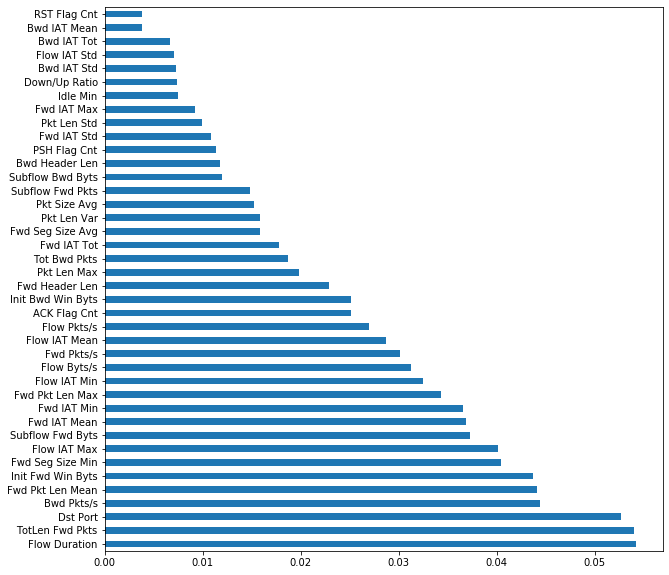

In [11]:
print('Top 40 features:')
print('---------------------------------')
feature_importances.nlargest(40).plot(kind='barh', figsize=(10,10))
print(feature_importances.nlargest(40))

Least 40 features:
---------------------------------
Timestamp            0.000000
Bwd PSH Flags        0.000000
Bwd URG Flags        0.000000
Fwd Byts/b Avg       0.000000
Fwd Pkts/b Avg       0.000000
Fwd Blk Rate Avg     0.000000
Bwd Byts/b Avg       0.000000
Bwd Pkts/b Avg       0.000000
Bwd Blk Rate Avg     0.000000
CWE Flag Count       0.000025
Fwd URG Flags        0.000035
Fwd PSH Flags        0.000051
SYN Flag Cnt         0.000063
Pkt Len Min          0.000064
Fwd Pkt Len Min      0.000075
Bwd Pkt Len Min      0.000093
FIN Flag Cnt         0.000137
Active Std           0.000185
ECE Flag Cnt         0.000192
Active Mean          0.000344
Fwd Act Data Pkts    0.000367
Idle Std             0.000369
Idle Mean            0.000431
Protocol             0.000508
Bwd Pkt Len Mean     0.000546
Pkt Len Mean         0.000796
TotLen Bwd Pkts      0.001123
URG Flag Cnt         0.001199
Active Min           0.001328
Bwd IAT Min          0.001491
Bwd Seg Size Avg     0.001520
Active Max       

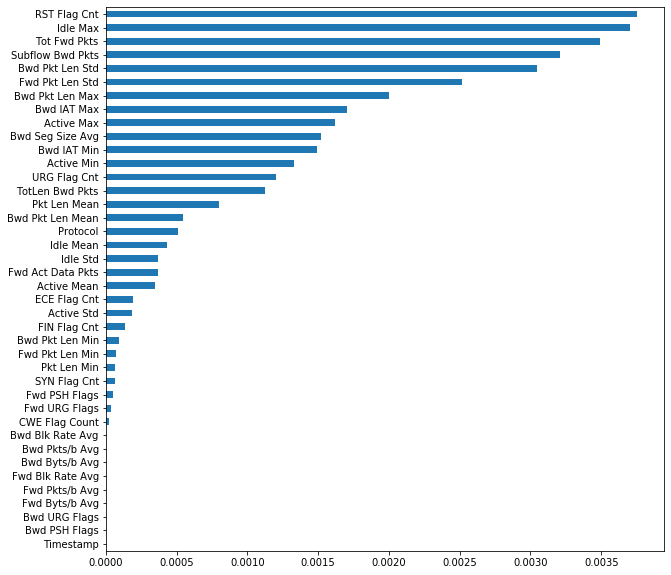

In [12]:
print('Least 40 features:')
print('---------------------------------')
feature_importances.nsmallest(40).plot(kind='barh', figsize=(10,10))
print(feature_importances.nsmallest(40))